## 1. 과거를 기억하는 신경망 - RNN

과거를 기억하는 신경망은 순서에 의미가 있는, 순서가 달라질 경우 그 의미가 손상되는 "순차적 데이터"에 활용!

예시)
- 자연어, 비디오, 음성과 오디오, 생물학적 서열

순차적 데이터는 데이터를 구성하는 요소들의 "순서"가 핵심적인 정보이며, 이전 시점의 데이터가 다음 시점의 데이터에 영향을 주는 특징이 있음

따라서, 기존의 머신러닝 기법이 아닌, 과거의 정보를 기억하고 순서의 의미를 학습하는 RNN을 활용해야 함

### RNN이란?

RNN(Recurrent Neural Network): 순환하는 구조를 가진, 순차 데이터 처리에 특화된 인공 신경망

### RNN의 작동원리

1. 시퀀스 데이터를 입력받아 순서 정보를 유지하며 처리

2. 순환하는 은닉층이 매 시점의 은닉 상태를 업데이트

3. 이전 시점의 값을 현재 시점으로 넘겨줌

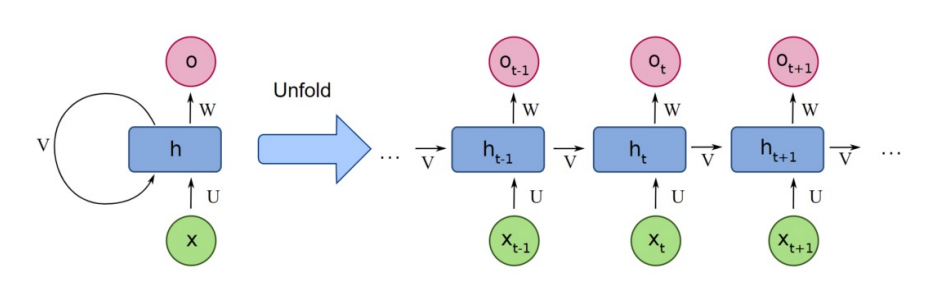

- x는 현재 시점에서의 입력값
- h는 현 시점의 '은닉 상태', 즉 현재 시점의 메모리
- o는 현재 시점에서의 출력값
- U는 현재 시점의 입력이 은닉 상태에 영향을 주는 가중치로, 현재 정보를 처리하는 역할
- V는 이전 시점의 은닉 상태가 현재 은닉 상태에 영향을 주는 '가중치'로서 과거 정보를 다음 시점으로 전달하는  역할
- W는 현재 시점의 은닉 상태가 최종 출력에 영향을 주는 가중치로서, 결과를 만들어내는 작업

RNN에서의 정보의 흐름

1. t-1시점: 입력xt-1이 들어가서 은닉상태 ht-1을 업데이트하고, 출력 ot-1을 출력
2. t시점: t-1시점에 계산된 은닉 상태(ht-1)이 다음 시점에 그대로 전달
3. 새로운 시점 xt와 전달받은 과거 정보 ht-1을 함께 사용하여 현재 시점의 은닉 상태 ht를 업데이트하고 출력 ot를 계산

RNN에서의 핵심 원리는 가중치 공유!

동일한 가중치를 시퀀스의 다양한 시점에서 반복적으로 적용하며, 이는 RNN이 시퀀스 데이터의 길이와 시점 위치에 상관없이 효과적으로 작동하게 하는 원리

가중치 공유의 이점

1. 학습 파라미터 수의 감소: 입력 시퀀스의 길이가 길어져도 학습해야 할 파라미터의 수가 일정하게 유지되어 모델이 더 빨라지고, 가볍게 만들 수 있음

2. 일반화 능력 향상: 이전 시점까지의 정보와 현재 시점의 입력이 주어졌을 때, 어떻게 상태를 업데이트 할 것인지에 대한 일반적 규칙을 학습한다. 따라서, 훈련 데이터에 없던 새로운 길이의 시퀀스나 다양한 패턴에도 유연한 대응이 가능

RNN의 한계

1. 기울기 소실과 기울기 폭주: RNN은 특성 상 전체 시퀀스를 모두 읽은 후 역전파가 이루어지는데, 이 과정에서 chiain rule에 의해 미분값이 반복적으로 곱해짐. 즉, 곱해지는 기울기 값이 1보다 작거나, 1보다 클 때, 각각 기울기 소실과 폭주 문제가 발생
2. 느린 훈련 시간: 계산 과정이 순차적으로 이루어져야 하는 구조적 한계로 인해 전체 시퀀스를 한 번에 병렬로 처리할 수 없음

이에 따른 '장기 의존성 문제' 발생

시퀀스의 앞 부분의 중요한 정보를 잊어버려 맥락 파악 능력이 급격히 저하되는 현상이 발생하여 모델의 '단기 기억력'은 준수하지만, '장기 기억력'에 문제가 발생

### 2. LSTM & GRU

게이트로 정보의 흐름을 제어하는 LSTM

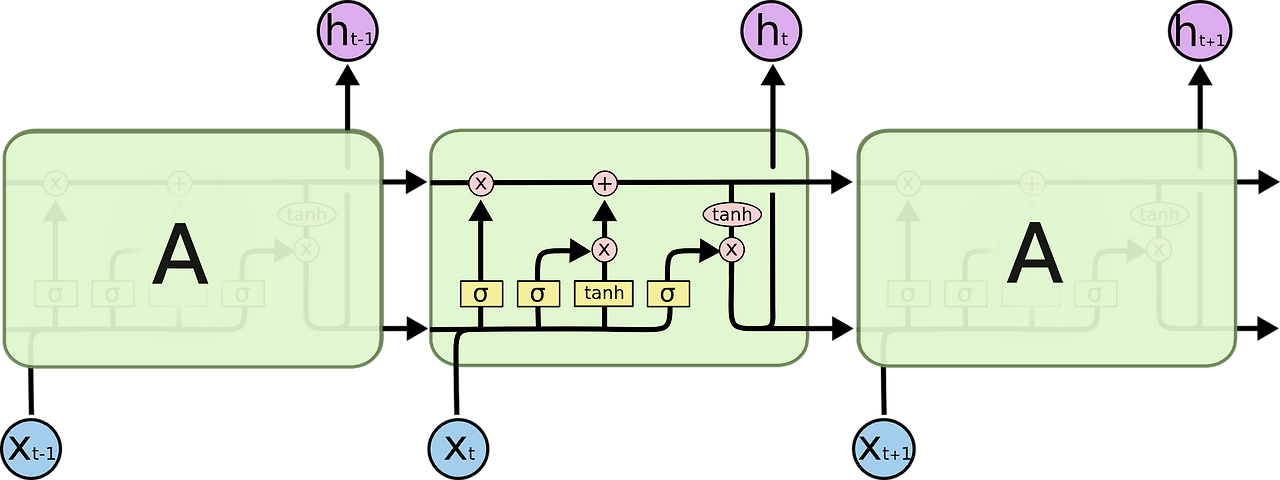

GATE를 통해 "기억할 내용"과 "잊어버릴 내용"을 선택하고, 중요한 정보를 오래 기억하는 구조이며, ct와 ht라는 2개의 순환되는 층을 사용하는데, ct는 장기기억, ht는 단기 기억을 의미함.

또한, gate를 통해 필요한 정보들만 통과시키는데, forget gate는 정보를 얼마나 잊어버릴지를 결정, input gate는 현재 정보를 얼마나 사용할지 결정, output gate는 다음 층으로 어떤 정보를 전달할지를 결정하며, final memory cell은 input, forget gate를 결합하여 현재 정보를 얼마나 기억할지 계산

LSTM의 장점과 단점
- 장점: gate를 통해 기억할 정보와 잊어버려도 되는 정보를 나눠서 관리하여 이전의 정보가 중요하게 판단된다면 완전히 보존되는 형태로 hidden gate를 갱신할 수 있음
- 단점: 많이 복잡한 구조로 학습 파라미터가 많아짐

단순하고 효율적인 구조의 GRU

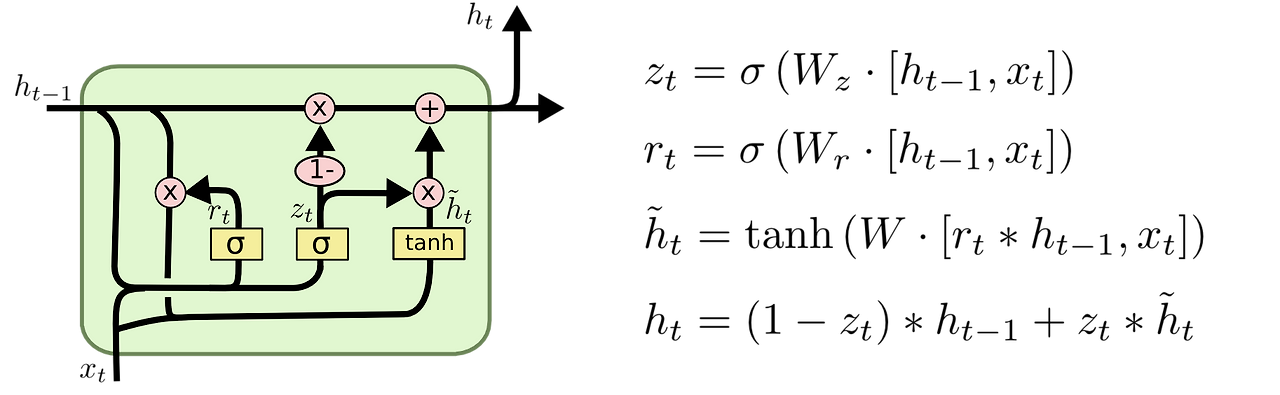

LSTM과 다르게,,
1. forget gate와 input gate를 'update gate' 하나로 합침
2. reset gate를 사용
3. gate의 개수가 3개에서 2개로 줄어 학습 시간이 줄어듦

따라서, GRU는 성능과 효율성 사이의 균형이 좋음. 그러나 긴 시퀀스 처리에서의 한계는 여전히 존재

LSTM vs GRU

LSTM이 적합한 경우
1. 긴 시퀀스에서 문맥 이해가 중요할 때
2. 데이터 양이 충분하고 복잡한 패턴을 학습해야 할 때
3. 모델 성능이 계산 효율보다 중요할 때
4. 기계 번역, 언어 모델링, 장기 시계열 예측

GRU가 적합한 경우
1. 자원이 제한적이거나 학습 속도가 중요할 때
2. 데이터 양이 적고 과적합 위험이 있을 때
3. 실시간 예측이 필요할 때
4. 음성 인식, 스트리밍 데이터, 실시간 비디오 분석, 짧은 시퀀스 기반의 텍스트 분류

### 3. 문장을 입력받아 문장을 출력하는 Seq2Seq

Seq2Seq은 한 시퀀스로 변환되는 작업을 수행하는 딥러닝 모델

Seq2Seq의 특징
1. 아이템 입력 개수와 출력 개수가 같지 않아도 됨
2. 인코더와 디코더라는 모듈을 가지고 있어, Encoder-Decoder 모델로도 불림

Encoder와 Decoder?

Encoder: 입력된 시퀀스를 읽고 압축하여 디코더에게 넘겨줄 문맥 정보를 준비하는 것으로 원문의 특징을 파악함

Decoder: 압축된 정보를 바탕으로 원하는 시퀀스를 생성하는 것

Seq2Seq의 한계 - 병목 현상

고정된 context vector에 소스 문장의 정보를 압축하여 병목 현상이 발생함. 따라서고정된 길이에 입력 시퀀스의 모든 정보를 담지 못하고 손실될 수 있음.